In [17]:
import sys
sys.path.append('./extraction_scripts/')
import arrow
import xarray as xr
import numpy as np
import glob
import netCDF4 as nc
import map_fxn as mf

In [106]:
def find_depth_deepalg(dp,prof,ts_y,ts_x, verbose = True):
    
    horizon = -9999
    water_depth = bathy['Bathymetry'][ts_y,ts_x]
    
    #case where no undersaturated water
    where_undersat = np.where(prof < 1); where_undersat = np.array(where_undersat)
    where_ssat = np.where((prof >= 1) & (prof < 1e19)); where_ssat = np.array(where_ssat)
    
    if(where_undersat.size == 0):
        if verbose:
            print('supersaturated to bottom')
        horizon = water_depth
        return horizon
    
    #case where only undersaturated water
    if(where_ssat.size == 0):
        if verbose:
            print('max aragonite found')
            print(np.max(prof[prof<1e19]))
        horizon = 0
        return horizon
    
    #case where last water cell is >1
    prof_water = prof[prof<1e20]
    last_water = prof_water[-1]
    if last_water >=1 :
        horizon = water_depth
        return horizon
    
    #case where there is some undersat water below all supersat water
    deepest_ssat = np.max(where_ssat)
    first_proper_undersat = (np.min(where_undersat[where_undersat>deepest_ssat]))
    horizon = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    
    return(horizon)

In [108]:
#### get stations - spacing 10



(1, 40)


station is:  0
x is : 2
y is : 392
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360


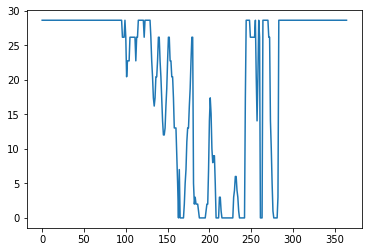

In [117]:
daily = nc.Dataset('./ncs/BR3_7asat_depth_sp10.nc')
daily_halocline = daily['arag_hor'][:]

from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(daily_halocline)

In [88]:
dp = np.array([1,2,3,4,5])
testar = np.array([0.5, 1.5, 0.5, 1.5, 1e20])

t = [2.1220067e+00 ,2.1157651e+00, 2.1026301e+00, 2.0881994e+00 2.0722318e+00
 2.0556872e+00 2.0376987e+00 2.0144215e+00 1.9877462e+00 1.9568869e+00
 1.9150203e+00 1.8680321e+00 1.8088342e+00 1.7404130e+00 1.6730932e+00
 1.6019267e+00 1.5287690e+00 1.4637965e+00 1.3955457e+00 1.3200153e+00
 1.2311723e+00 1.1432377e+00 1.0954510e+00 1.0620425e+00 1.0305014e+00
 9.9139780e-01 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20
 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20
 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20]
water_depth = 23



horizon = find_depth_deepalg(dp,testar,ts_y,ts_x)
print(horizon) 

23


In [97]:
dp = grid['gdept_0'][:]

# def find_depth_deepalg(dp,prof,ts_y,ts_x, verbose = True):
    
#     horizon = -9999
#     water_depth = bathy['Bathymetry'][ts_y,ts_x]
    
#     #case where no undersaturated water
#     where_undersat = np.where(prof < 1); where_undersat = np.array(where_undersat)
#     where_ssat = np.where((prof >= 1) & (prof < 1e19)); where_ssat = np.array(where_ssat)
    
#     if(where_undersat.size == 0):
#         if verbose:
#             print('supersaturated to bottom')
#         horizon = water_depth
#         return horizon
    
#     #case where only undersaturated water
#     if(where_ssat.size == 0):
#         if verbose:
#             print('max aragonite found')
#             print(np.max(prof[prof<1e19]))
#         horizon = 0
#         return horizon
    
#     #case where last water cell is >1
#     prof_water = prof[prof<1e20]
#     last_water = prof_water[-1]
#     if last_water >=1 :
#         horizon = water_depth
#         return horizon
    
#     #case where there is some undersat water below all supersat water
#     deepest_ssat = np.max(where_ssat)
#     first_proper_undersat = (np.min(where_undersat[where_undersat>deepest_ssat]))
#     horizon = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    
#     return(horizon)



bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
print(bathy['Bathymetry'][ts_y,ts_x])

dp = np.array([1,2,3,4,5])
toma2 = np.array([2,2,2,.9,1e20])
tdepth = find_depth_deepalg(dp,toma2,ts_y,ts_x)

print(tdepth)

84.3125
3.5


In [89]:
def find_depth_deepalg(dp,prof,ts_y,ts_x, verbose = True):
    
    horizon = -9999
    water_depth = bathy['Bathymetry'][ts_y,ts_x]
    
    #case where no undersaturated water
    where_undersat = np.where(prof < 1); where_undersat = np.array(where_undersat)
    where_ssat = np.where((prof >= 1) & (prof < 1e19)); where_ssat = np.array(where_ssat)
    
    if(where_undersat.size == 0):
        if verbose:
            print('supersaturated to bottom')
        horizon = water_depth
        return horizon
    
    #case where only undersaturated water
    if(where_ssat.size == 0):
        if verbose:
            print('max aragonite found')
            print(np.max(prof[prof<1e19]))
        horizon = 0
        return horizon
    
    #case where last water cell is >1
    prof_water = prof[prof<1e20]
    last_water = prof_water[-1]
    if last_water >=1 :
        horizon = water_depth
        return horizon
    
    #case where there is some undersat water below all supersat water
    deepest_ssat = np.max(where_ssat)
    first_proper_undersat = (np.min(where_undersat[where_undersat>deepest_ssat]))
    horizon = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    
    return(horizon)


In [2]:
def yearomahor_de(spacing,stn_b,stn_e,year):
    
    import map_fxn as mf
    import time
    import xarray as xr
    import numpy as np
    print('Spacing between stations: ' + str(spacing))
    
    bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
    grid = mf.import_bathy(bath)
    fmask = (grid.fmask[0,0,:,:])
    
    stn_x, stn_y = mf.make_stns(spacing)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
    
#     no_stns = len(d_stn_x)
#     monlist = ['jan','feb','mar','apr','may','jun','jul','aug','sep',
#               'oct','nov','dec']

#     if year == 2016: 
#         daylist = [31,29,31,30,31,30,31,31,30,31,30,31]
#         noday = 366  
#     else:
#         daylist = [31,28,31,30,31,30,31,31,30,31,30,31]
#         noday = 365    

    
#     print(year)
#     print(noday)
        
#     # a list of all the model outputs (tracers) for this year
#     trace_list = mf.create_physlist(year)
    
    print("Number of stations:" + str(no_stns))
    bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
    grid = mf.import_bathy(bath)
    fmask = (grid.fmask[0,0,:,:])

    for stn in range(stn_b,stn_e):
    
        print('station is: ' ,str(stn))
        print('x is :', d_stn_x[stn])
        print('y is :', d_stn_y[stn])
        
        ts_x = d_stn_x[stn]
        ts_y = d_stn_y[stn]
        
        daily_halocline = np.zeros(noday)
        
        end_day = noday
        for day in range(1,end_day+1):
            if (day%20 ==0) :
                print(day)
            trc = trace_list[day-1]
            #print(trc)
            nemo = xr.open_mfdataset(trc)
            halo = halo_de(nemo,grid,ts_x,ts_y)
            q = isinstance(halo, (np.ndarray))
            if (q == True) :
                print('found an array!')
                daily_halocline[day-1] = halo[0]
            else:
                daily_halocline[day-1] = halo

        halo = xr.Dataset({'halocline_depth':(['t'], daily_halocline)})
        stn_name = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/CLUSTER_201905/NC_HINDCAST/' +  str(year)+ '/HALO_TS/stn_' + str(stn)  + 'halo_depth_sp' + str(spacing)+ '.nc'
        halo.to_netcdf(stn_name)
        

def halo_de(nemo,grid,ts_x,ts_y):
    import numpy as np
    
    #retreive distances between grid cells ("distance between this grid cell and the one before it")

    delt_z = grid.variables['e3t'][0,:,ts_y:ts_y+1,ts_x:ts_x+1]
    #remove the stupid singletons
    delt_z = delt_z.values
    delt_z = np.squeeze(delt_z)
    
    sal = nemo.vosaline[0,:,ts_y:ts_y+1,ts_x:ts_x+1]
    depth = nemo.deptht
    dv = depth.values[:]
    sv = sal.values[:]
    sv = np.squeeze(sv)

    #for this grid cell, where do we no longer have salinity values?
    bottom = np.where(sv ==0)
    bottom = bottom[0]
    bottom = bottom[0]

    fxnl_sal = sv[0:bottom]
    fxnl_e3t = delt_z[0:bottom]
    fxnl_depth = dv[0:bottom]
    
    sal_gradient = np.zeros_like(fxnl_depth)

    #calculating gradient
    for i in range(1,bottom):
        sal_gradient[i] = (fxnl_sal[i]-fxnl_sal[i-1])/fxnl_e3t[i]
        
    mg = max(sal_gradient)
    #print(mg)

    halocline = np.where(sal_gradient == mg)
    halocline = np.squeeze(halocline)

    halocline = fxnl_depth[halocline]

    
    return halocline


20151201
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151201.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151202.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151203.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151204.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151205.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151206.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151207.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151208.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151209.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151210.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151211.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151212.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151213.nc']
['/data/tjarniko/results/BASERUN_EXP/Oma_c

In [8]:
dayar[6]

'/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20151207.nc'